In [41]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
import geopandas as gpd
import itertools
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [39]:
df = pd.read_csv('clean_data.csv')
df.head()

/var/folders/4m/9pclm3z145q989bp0z7zcgnh0000gn/T/ipykernel_52106/1991320366.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('clean_data.csv')


,IndexRow,Id,Program Name,Description,Org Name,Category Name,Capacity,Min Age,Max Age,Meeting Type,...,Start Date,End Date,Program Price,Geographic Cluster Name,Program Pays Participants,Program Has Scholarships,Program Provides Transportation,Latitude,Longitude,Program Provides Free Food
0,"4,568",78752,BBBS Community Based Mentoring (Year Round),Community Based Mentoring is the traditional B...,Big Brothers Big Sisters,Academic Support,2000.0,7,15,face_to_face,...,2020-01-01,12/31/20,Free,NEAR WEST SIDE,Not Paid,YES,YES,41.886002,-87.642403,False
1,"4,569",78752,BBBS Community Based Mentoring (Year Round),Community Based Mentoring is the traditional B...,Big Brothers Big Sisters,Work + Career,2000.0,7,15,face_to_face,...,2020-01-01,12/31/20,Free,NEAR WEST SIDE,Not Paid,YES,YES,41.886002,-87.642403,False
2,"4,562",78749,Youth Mentoring and Academic Supports,Young Men's Educational Network provides mento...,Youth Mentoring and Academic Supports,Academic Support,100.0,12,18,face_to_face,...,2020-01-01,12/31/20,Free,NORTH LAWNDALE,Not Paid,NO,NO,41.864799,-87.724800,True
3,"4,563",78749,Youth Mentoring and Academic Supports,Young Men's Educational Network provides mento...,Youth Mentoring and Academic Supports,Music & Art.,100.0,12,18,face_to_face,...,2020-01-01,12/31/20,Free,NORTH LAWNDALE,Not Paid,NO,NO,41.864799,-87.724800,True
4,"10,971",84422,Geocode Test 10_27_20,<p>Test for geocoding and cluster encoding</p>,Digital Youth Network,Building and Fixing Things,NaN,4,21,online,...,2020-06-01,7/2/20,Free,ROSELAND,Not Paid,NO,NO,NaN,NaN,False


In [15]:
# just one attempt; not finalized
from sklearn.metrics import mean_squared_error

df = pd.read_csv('clean_data.csv')

df['Start Date'] = pd.to_datetime(df['Start Date'])
df['Year'] = df['Start Date'].dt.year
df['Month'] = df['Start Date'].dt.month
grouped_data = df.groupby(['Year', 'Month', 'Geographic Cluster Name']).size().reset_index(name='Program Count')

test_year = 2022  # Specify the year for testing
train_data = grouped_data[grouped_data['Year'] != test_year]
test_data = grouped_data[grouped_data['Year'] == test_year]

cluster_names = train_data['Geographic Cluster Name'].unique()
prediction_table = pd.DataFrame()

for cluster in cluster_names:
    cluster_train_data = train_data[train_data['Geographic Cluster Name'] == cluster]
    
    X_train = cluster_train_data[['Year', 'Month']]
    y_train = cluster_train_data['Program Count']
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    cluster_test_data = test_data[test_data['Geographic Cluster Name'] == cluster]
    
    X_test = cluster_test_data[['Year', 'Month']]
    y_test = cluster_test_data['Program Count']
    
    predictions = model.predict(X_test)
    
    cluster_predictions = pd.DataFrame({'Year': cluster_test_data['Year'],
                                        'Month': cluster_test_data['Month'],
                                        'Geographic Cluster': cluster,
                                        'Actual Programs': y_test,
                                        'Predicted Programs': predictions})
    prediction_table = pd.concat([prediction_table, cluster_predictions], ignore_index=True)

mse = mean_squared_error(prediction_table['Actual Programs'], prediction_table['Predicted Programs'])
rmse = np.sqrt(mse)

print("Predictions:")
print(prediction_table)
print("\nAccuracy Metrics:")
print("Root Mean Squared Error (RMSE):", rmse)

/var/folders/4m/9pclm3z145q989bp0z7zcgnh0000gn/T/ipykernel_32745/1176629102.py:4: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('clean_data.csv')


Predictions:
     Year  Month Geographic Cluster  Actual Programs  Predicted Programs
0    2022      1     NEAR WEST SIDE              123           89.779995
1    2022      2     NEAR WEST SIDE                7           90.320237
2    2022      3     NEAR WEST SIDE                7           90.860478
3    2022      4     NEAR WEST SIDE              200           91.400720
4    2022      5     NEAR WEST SIDE               89           91.940962
..    ...    ...                ...              ...                 ...
824  2022      5    CALUMET HEIGHTS                2            7.758929
825  2022      7    CALUMET HEIGHTS                5            5.937500
826  2022      8    CALUMET HEIGHTS                4            5.026786
827  2022      9    CALUMET HEIGHTS                6            4.116071
828  2022      6           BURNSIDE                1            1.000000

[829 rows x 5 columns]

Accuracy Metrics:
Root Mean Squared Error (RMSE): 41.81246680112334


In [53]:
# important; historical df for cluster program count by month
df = pd.read_csv('clean_data.csv')

df['Start Date'] = pd.to_datetime(df['Start Date'])

df['Month'] = df['Start Date'].dt.strftime('%Y-%m')

grouped_df = df.groupby(['Geographic Cluster Name', 'Month']).size().reset_index(name='Count')

print(grouped_df)
grouped_df.to_csv('clustermonthcount.csv', index=False)

grouped_df

/var/folders/4m/9pclm3z145q989bp0z7zcgnh0000gn/T/ipykernel_52106/3397420509.py:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('clean_data.csv')


     Geographic Cluster Name    Month  Count
0                ALBANY PARK  2020-07      8
1                ALBANY PARK  2020-09      2
2                ALBANY PARK  2020-11      4
3                ALBANY PARK  2020-12      1
4                ALBANY PARK  2021-01      2
...                      ...      ...    ...
2281                WOODLAWN  2022-11      1
2282                WOODLAWN  2022-12     12
2283                WOODLAWN  2023-01     38
2284                WOODLAWN  2023-02      2
2285                WOODLAWN  2023-04     15

[2286 rows x 3 columns]


,Geographic Cluster Name,Month,Count
0,ALBANY PARK,2020-07,8
1,ALBANY PARK,2020-09,2
2,ALBANY PARK,2020-11,4
3,ALBANY PARK,2020-12,1
4,ALBANY PARK,2021-01,2
...,...,...,...
2281,WOODLAWN,2022-11,1
2282,WOODLAWN,2022-12,12
2283,WOODLAWN,2023-01,38
2284,WOODLAWN,2023-02,2


In [186]:
df = pd.read_csv('clustermonthcount.csv')  

df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)
df = df.pivot(columns='Geographic Cluster Name', values='Count')

# Train the SARIMA model and make predictions
predictions = {}
order = (1, 1, 0)  
seasonal_order = (0, 1, 1, 12)  

for column in df.columns:
    try:
        model = SARIMAX(df[column], order=order, seasonal_order=seasonal_order,
                        enforce_stationarity=False, enforce_invertibility=False)
        model_fit = model.fit(disp=False)
        pred = model_fit.get_forecast(steps=24)
        predictions[column] = pred.predicted_mean
    except Exception as e:
        print(f"Error occurred for column '{column}': {str(e)}")

table_data = pd.DataFrame(predictions)
table_data.index = pd.date_range(start=df.index[-1] + pd.DateOffset(months=1), periods=24, freq='M').strftime('%Y-%m')
table_data.index.name = 'Date'

# Display the table
print(table_data)

table_data.to_csv('sarima_predictions.csv')

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `st

         ALBANY PARK  ARCHER HEIGHTS  ARMOUR SQUARE     ASHBURN  \
Date                                                              
2023-12    30.638286       11.665116       9.625813   39.715410   
2024-01    47.733845       51.543805      52.311436  111.474313   
2024-02    19.675269       20.018393      11.796588   29.723026   
2024-03    33.447895       29.823921       8.891782   32.737297   
2024-04    68.715969       50.544048      50.189356  131.549741   
2024-05    15.252162      -61.287974       5.663351   45.420150   
2024-06    42.213357       35.741085      12.873480   80.827149   
2024-07    51.207553       46.828156      29.945564   85.827967   
2024-08    49.363648       46.905664      26.033194   78.512683   
2024-09    68.799463       45.632282      44.563498  131.195874   
2024-10    46.159332       27.034723      13.438348   58.030334   
2024-11    35.905239       25.325705       7.339468   56.512635   
2024-12    42.922949       28.097452      12.396229   58.30636

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [60]:
predictions = pd.read_csv('sarima_predictions.csv', index_col='Date', parse_dates=True)

cluster_names = predictions.columns

table_data = pd.DataFrame(columns=['Geographic Cluster Name', 'Count for 2024', 'Count for 2025'])

# Iterate over each cluster
for cluster in cluster_names:
    cluster_counts = predictions[cluster]

    # Aggregate the counts for 2024 and 2025
    count_2024 = cluster_counts[cluster_counts.index.year == 2024].sum()
    count_2025 = cluster_counts[cluster_counts.index.year == 2025].sum()

    row = {
        'Geographic Cluster Name': cluster,
        'Count for 2024': count_2024,
        'Count for 2025': count_2025
    }

    table_data = table_data.append(row, ignore_index=True)

# Display the table
print(table_data)
table_data.to_csv('years_count_sarima.csv', index=False)

   Geographic Cluster Name  Count for 2024  Count for 2025
0              ALBANY PARK      521.396679      616.260626
1           ARCHER HEIGHTS      346.207262      498.865504
2            ARMOUR SQUARE      275.442294      293.507505
3                  ASHBURN      900.117536     1046.311718
4           AUBURN GRESHAM      341.093641      350.790506
..                     ...             ...             ...
73               WEST LAWN      242.402244      176.969818
74            WEST PULLMAN     1389.302901     1961.591057
75              WEST RIDGE       80.465109     -217.758156
76               WEST TOWN      966.994250     1070.890590
77                WOODLAWN    -2919.010834    -4985.688218

[78 rows x 3 columns]


/var/folders/4m/9pclm3z145q989bp0z7zcgnh0000gn/T/ipykernel_52106/2649064189.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table_data = table_data.append(row, ignore_index=True)
/var/folders/4m/9pclm3z145q989bp0z7zcgnh0000gn/T/ipykernel_52106/2649064189.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table_data = table_data.append(row, ignore_index=True)
/var/folders/4m/9pclm3z145q989bp0z7zcgnh0000gn/T/ipykernel_52106/2649064189.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table_data = table_data.append(row, ignore_index=True)
/var/folders/4m/9pclm3z145q989bp0z7zcgnh0000gn/T/ipykernel_52106/2649064189.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future v

In [37]:
years_count_sarima = pd.read_csv('years_count_sarima.csv')
# Filter years_count_sarima.csv for priority clusters
priority_clusters = [
    'AUSTIN', 'NORTH LAWNDALE', 'HUMBOLDT PARK', 'EAST GARFIELD PARK', 'ENGLEWOOD',
    'AUBURN GRESHAM', 'WEST GARFIELD PARK', 'ROSELAND', 'GREATER GRAND CROSSING',
    'WEST ENGLEWOOD', 'SOUTH SHORE', 'NEW CITY', 'CHICAGO LAWN', 'SOUTH LAWNDALE', 'WEST PULLMAN'
]

filtered_data = years_count_sarima[years_count_sarima['Geographic Cluster Name'].isin(priority_clusters)]

# Display the filtered data
print(filtered_data)


   Geographic Cluster Name  Count for 2024  Count for 2025
4           AUBURN GRESHAM      341.093641      350.790506
5                   AUSTIN      709.945065      551.249232
15            CHICAGO LAWN      131.005984       18.511609
19      EAST GARFIELD PARK      363.273276      407.855777
23               ENGLEWOOD      247.259890      277.753616
30  GREATER GRAND CROSSING      564.265173      773.002184
33           HUMBOLDT PARK      884.138005     1053.205652
51                NEW CITY      506.758558      442.106579
53          NORTH LAWNDALE      493.297287      499.008726
62                ROSELAND      217.320190      216.611788
65          SOUTH LAWNDALE      479.558471      496.975868
66             SOUTH SHORE      153.619436       72.275090
71          WEST ENGLEWOOD      375.238476      438.922833
72      WEST GARFIELD PARK      440.575845      440.831602
74            WEST PULLMAN     1389.302901     1961.591057


In [35]:
# Read the SARIMA predictions file
predictions = pd.read_csv('sarima_predictionsnew.csv', index_col='Date', parse_dates=True)

# Get the unique cluster names from the column names
cluster_names = predictions.columns

# Create a new table to store the aggregated counts for each year
table_data = pd.DataFrame(columns=['Geographic Cluster Name', 'Count for 2024', 'Count for 2025'])

# Iterate over each cluster
for cluster in cluster_names:
    # Get the counts for the respective cluster
    cluster_counts = predictions[cluster]

    # Aggregate the counts for 2024 and 2025
    count_2024 = cluster_counts[cluster_counts.index.year == 2024].sum()
    count_2025 = cluster_counts[cluster_counts.index.year == 2025].sum()

    # Create a row for the cluster in the table
    row = {
        'Geographic Cluster Name': cluster,
        'Count for 2024': count_2024,
        'Count for 2025': count_2025
    }

    # Append the row to the table
    table_data = table_data.append(row, ignore_index=True)

# Display the table
print(table_data)
table_data.to_csv('years_count_sarima2.csv', index=False)

/var/folders/4m/9pclm3z145q989bp0z7zcgnh0000gn/T/ipykernel_52106/2191541541.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table_data = table_data.append(row, ignore_index=True)
/var/folders/4m/9pclm3z145q989bp0z7zcgnh0000gn/T/ipykernel_52106/2191541541.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table_data = table_data.append(row, ignore_index=True)
/var/folders/4m/9pclm3z145q989bp0z7zcgnh0000gn/T/ipykernel_52106/2191541541.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table_data = table_data.append(row, ignore_index=True)
/var/folders/4m/9pclm3z145q989bp0z7zcgnh0000gn/T/ipykernel_52106/2191541541.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future v

   Geographic Cluster Name  Count for 2024  Count for 2025
0              ALBANY PARK   -3.252988e+47    2.616832e+64
1           ARCHER HEIGHTS    3.159218e+02    3.790245e+02
2            ARMOUR SQUARE   -6.514079e+84   2.453151e+114
3                  ASHBURN   -1.928720e+02   -1.150344e+04
4           AUBURN GRESHAM    3.528061e+02    3.815218e+02
..                     ...             ...             ...
73               WEST LAWN    2.213447e+02    1.359413e+02
74            WEST PULLMAN    1.503050e+03    2.166652e+03
75              WEST RIDGE   -1.103631e+02   -4.255783e+02
76               WEST TOWN    8.364676e+02    8.977582e+02
77                WOODLAWN   -1.462015e+03   -2.492131e+03

[78 rows x 3 columns]


/var/folders/4m/9pclm3z145q989bp0z7zcgnh0000gn/T/ipykernel_52106/2191541541.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table_data = table_data.append(row, ignore_index=True)
/var/folders/4m/9pclm3z145q989bp0z7zcgnh0000gn/T/ipykernel_52106/2191541541.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table_data = table_data.append(row, ignore_index=True)
/var/folders/4m/9pclm3z145q989bp0z7zcgnh0000gn/T/ipykernel_52106/2191541541.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table_data = table_data.append(row, ignore_index=True)
/var/folders/4m/9pclm3z145q989bp0z7zcgnh0000gn/T/ipykernel_52106/2191541541.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future v

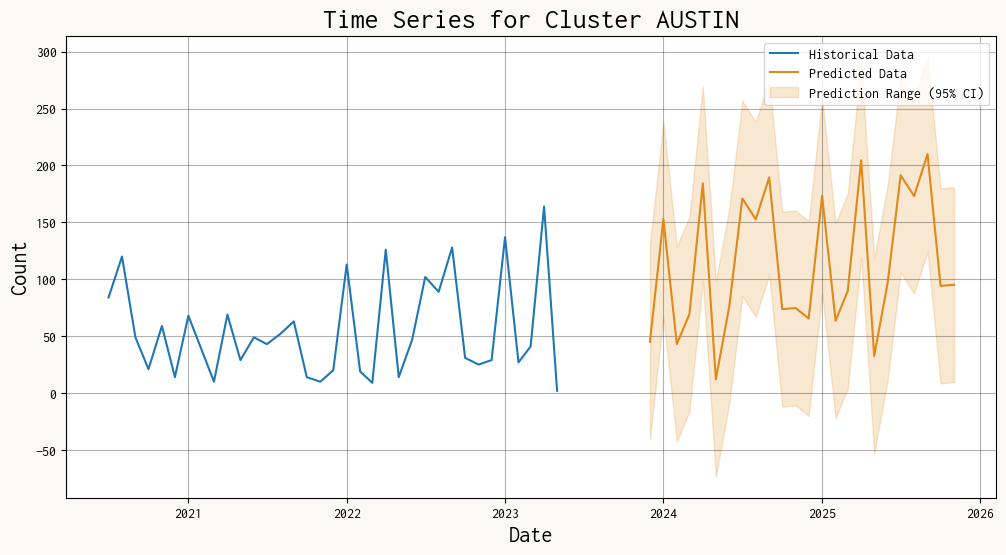

In [16]:
historical_data = pd.read_csv('clustermonthcount.csv')
predictions = pd.read_csv('sarima_predictionsnew.csv', index_col='Date', parse_dates=True)

cluster_name = 'AUSTIN'
historical_data = historical_data[historical_data['Geographic Cluster Name'] == cluster_name]
historical_data['Month'] = pd.to_datetime(historical_data['Month'])
historical_data.set_index('Month', inplace=True)
historical_data = historical_data['Count']

data = pd.concat([historical_data, predictions[cluster_name]])

plt.rcParams['font.family'] = 'Inconsolata'

# Historical data (excluding the last 12 months)
historical_data = data[:-24]  
# Predicted data (last 12 months)
predicted_data = data[-24:]  

historical_mean = historical_data.mean()
historical_std = historical_data.std()

z_score = 1.96  # Z-score for a 95% confidence interval (two-tailed)
lower_bound = predictions[cluster_name] - z_score * historical_std
upper_bound = predictions[cluster_name] + z_score * historical_std

plt.figure(figsize=(12, 6), facecolor='#FAF9F6')
ax = plt.axes(facecolor='white')  # Set the background color of the plot to white
ax.plot(historical_data.index, historical_data, label='Historical Data')
ax.plot(predicted_data.index, predicted_data, label='Predicted Data', color='#DF8919')

plt.fill_between(predicted_data.index, lower_bound, upper_bound,
                 color='#DF8919', alpha=0.2, label='Prediction Range (95% CI)')

plt.xlabel('Date', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.title(f'Time Series for Cluster {cluster_name}', fontsize=20)
plt.legend()
plt.grid(True, color='black', alpha=0.3) 
plt.savefig('austin_timeseries.png', dpi=300) 

plt.show()


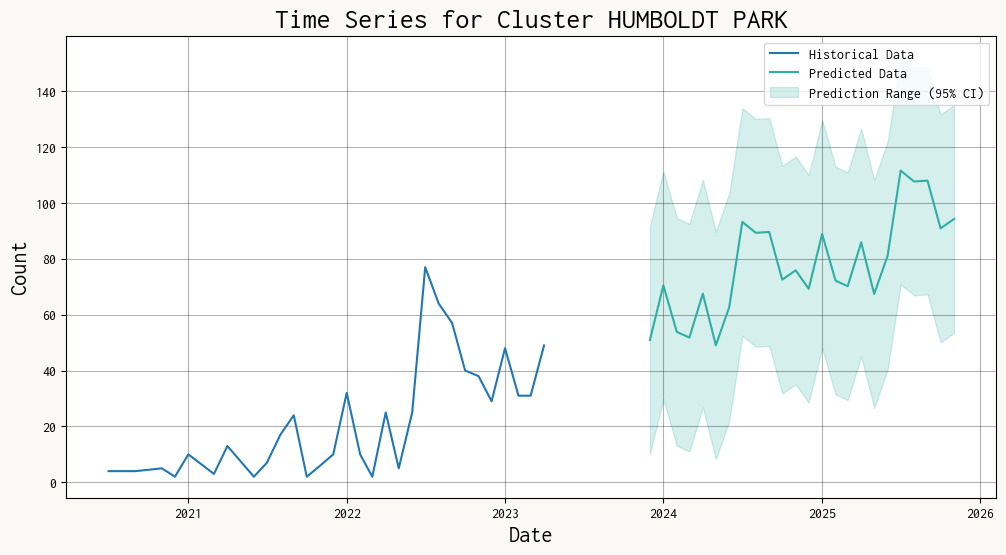

In [14]:
historical_data = pd.read_csv('clustermonthcount.csv')
predictions = pd.read_csv('sarima_predictionsnew.csv', index_col='Date', parse_dates=True)

cluster_name = 'HUMBOLDT PARK'
historical_data = historical_data[historical_data['Geographic Cluster Name'] == cluster_name]
historical_data['Month'] = pd.to_datetime(historical_data['Month'])
historical_data.set_index('Month', inplace=True)
historical_data = historical_data['Count']

data = pd.concat([historical_data, predictions[cluster_name]])

plt.rcParams['font.family'] = 'Inconsolata'

# Historical data (excluding the last 12 months)
historical_data = data[:-24]  
# Predicted data (last 12 months)
predicted_data = data[-24:]  

historical_mean = historical_data.mean()
historical_std = historical_data.std()

z_score = 1.96  # Z-score for a 95% confidence interval (two-tailed)
lower_bound = predictions[cluster_name] - z_score * historical_std
upper_bound = predictions[cluster_name] + z_score * historical_std

plt.figure(figsize=(12, 6), facecolor='#FAF9F6')
ax = plt.axes(facecolor='white')  # Set the background color of the plot to white
ax.plot(historical_data.index, historical_data, label='Historical Data')
ax.plot(predicted_data.index, predicted_data, label='Predicted Data', color='#2EAFA4')

plt.fill_between(predicted_data.index, lower_bound, upper_bound,
                 color='#2EAFA4', alpha=0.2, label='Prediction Range (95% CI)')

plt.xlabel('Date', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.title(f'Time Series for Cluster {cluster_name}', fontsize=20)
plt.legend()
plt.grid(True, color='black', alpha=0.3) 
plt.savefig('humboldt_timeseries.png', dpi=300) 

plt.show()

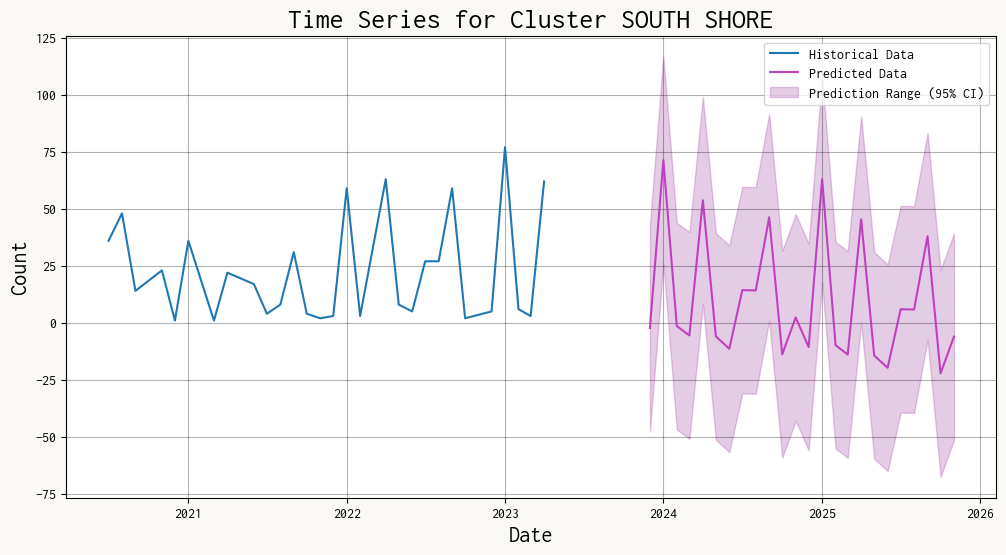

In [12]:
historical_data = pd.read_csv('clustermonthcount.csv')
predictions = pd.read_csv('sarima_predictions.csv', index_col='Date', parse_dates=True)

cluster_name = 'SOUTH SHORE'
historical_data = historical_data[historical_data['Geographic Cluster Name'] == cluster_name]
historical_data['Month'] = pd.to_datetime(historical_data['Month'])
historical_data.set_index('Month', inplace=True)
historical_data = historical_data['Count']

data = pd.concat([historical_data, predictions[cluster_name]])

plt.rcParams['font.family'] = 'Inconsolata'

# Historical data (excluding the last 12 months)
historical_data = data[:-24]  
# Predicted data (last 12 months)
predicted_data = data[-24:]  

historical_mean = historical_data.mean()
historical_std = historical_data.std()

z_score = 1.96  # Z-score for a 95% confidence interval (two-tailed)
lower_bound = predictions[cluster_name] - z_score * historical_std
upper_bound = predictions[cluster_name] + z_score * historical_std

plt.figure(figsize=(12, 6), facecolor='#FAF9F6')
ax = plt.axes(facecolor='white')  # Set the background color of the plot to white
ax.plot(historical_data.index, historical_data, label='Historical Data')
ax.plot(predicted_data.index, predicted_data, label='Predicted Data', color='#BF40BF')

plt.fill_between(predicted_data.index, lower_bound, upper_bound,
                 color='purple', alpha=0.2, label='Prediction Range (95% CI)')

plt.xlabel('Date', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.title(f'Time Series for Cluster {cluster_name}', fontsize=20)
plt.legend()
plt.grid(True, color='black', alpha=0.3) 
plt.savefig('southshore_timeseries.png', dpi=300) 

plt.show()

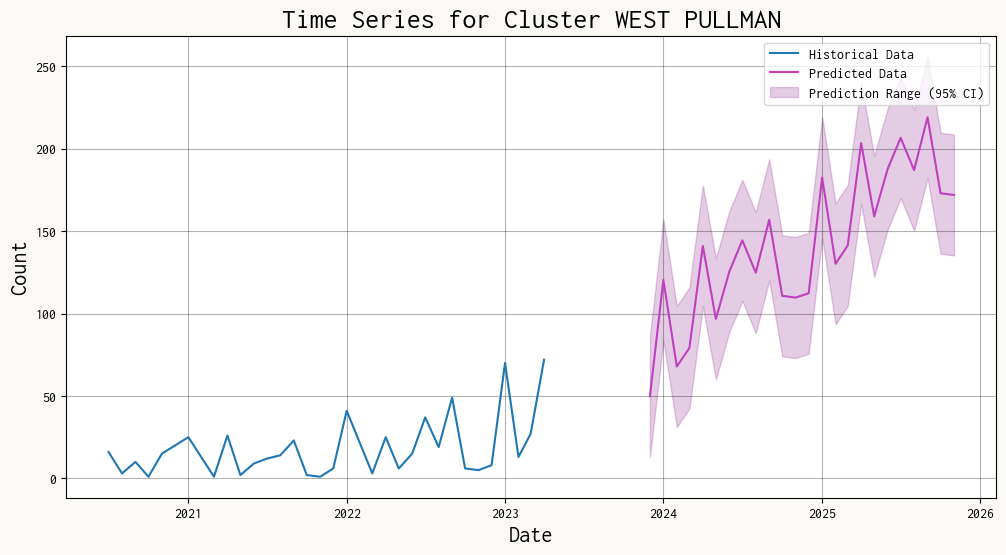

In [30]:
historical_data = pd.read_csv('clustermonthcount.csv')
predictions = pd.read_csv('sarima_predictions.csv', index_col='Date', parse_dates=True)

cluster_name = 'WEST PULLMAN'
historical_data = historical_data[historical_data['Geographic Cluster Name'] == cluster_name]
historical_data['Month'] = pd.to_datetime(historical_data['Month'])
historical_data.set_index('Month', inplace=True)
historical_data = historical_data['Count']

data = pd.concat([historical_data, predictions[cluster_name]])

plt.rcParams['font.family'] = 'Inconsolata'

# Historical data (excluding the last 12 months)
historical_data = data[:-24]  
# Predicted data (last 12 months)
predicted_data = data[-24:]  

historical_mean = historical_data.mean()
historical_std = historical_data.std()

z_score = 1.96  # Z-score for a 95% confidence interval (two-tailed)
lower_bound = predictions[cluster_name] - z_score * historical_std
upper_bound = predictions[cluster_name] + z_score * historical_std

plt.figure(figsize=(12, 6), facecolor='#FAF9F6')
ax = plt.axes(facecolor='white')  # Set the background color of the plot to white
ax.plot(historical_data.index, historical_data, label='Historical Data')
ax.plot(predicted_data.index, predicted_data, label='Predicted Data', color='#BF40BF')

plt.fill_between(predicted_data.index, lower_bound, upper_bound,
                 color='purple', alpha=0.2, label='Prediction Range (95% CI)')

plt.xlabel('Date', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.title(f'Time Series for Cluster {cluster_name}', fontsize=20)
plt.legend()
plt.grid(True, color='black', alpha=0.3) 
# plt.savefig('southshore_timeseries.png', dpi=300) 

plt.show()

In [63]:
# chi_map = gpd.read_file('chi_shapefile/geo_export_ac7aa850-c5f5-48c3-8b86-051ed02f73db.shx')

# grouped_df = pd.read_csv('clustermonthcount.csv')

# counts_2024 = pd.read_csv('years_count_sarima.csv')

# priority_clusters = [
#     'AUSTIN', 'NORTH LAWNDALE', 'HUMBOLDT PARK', 'EAST GARFIELD PARK', 'ENGLEWOOD',
#     'AUBURN GRESHAM', 'WEST GARFIELD PARK', 'ROSELAND', 'GREATER GRAND CROSSING',
#     'WEST ENGLEWOOD', 'SOUTH SHORE', 'NEW CITY', 'CHICAGO LAWN', 'SOUTH LAWNDALE', 'WEST PULLMAN'
# ]

# filtered_df = grouped_df[
#     (grouped_df['Geographic Cluster Name'].isin(priority_clusters)) &
#     (grouped_df['Month'].str.contains('2022'))
# ]

# merged_data = filtered_df.merge(counts_2024, on='Geographic Cluster Name', how='left')

# merged_data['Percent Change'] = ((merged_data['Count for 2024'] - merged_data['Count']) / merged_data['Count']) * 100

# merged_shapefile = chi_map.merge(merged_data, left_on='community', right_on='Geographic Cluster Name', how='left')

# merged_shapefile['Percentage Distribution'] = 0

# merged_shapefile.loc[merged_shapefile['community'].isin(priority_clusters), 'Percentage Distribution'] = (
#     merged_shapefile['Percent Change']
# )

# fig, ax = plt.subplots(figsize=(12, 8))
# merged_shapefile.plot(column='Percentage Distribution', cmap='PuBu', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
# ax.set_axis_off()
# plt.title('Predicted Change in Program Count for Priority Clusters (2022 to 2024)')

# plt.show()